### Ford GoBike System Data

#### Preliminary Wrangling

this document explore the datasets contain information about 183412 riders 

In [2]:
#Import all packages and set plot to embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
gobike=pd.read_csv('./data/fordgobike-tripdata.csv')

## 1-Gather

In [4]:
gobike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### 2-Assess

In [6]:
gobike.shape

(183412, 16)

In [7]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
gobike.duplicated().sum()

0

In [12]:
print(gobike.user_type.value_counts(),'\n')
print(gobike.member_gender.value_counts(),'\n')
print(gobike.bike_share_for_all_trip.value_counts(),'\n')

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64 

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64 

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64 



In [13]:
gobike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### From the data we can notice that :


1-start_time and end time should be datetime

2-user_type ,member_gender,bike_share_for_all_trip should be converted from object to Category

3-we should add column to member_age from member_birth_year to see the distribution of ages

In [14]:
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


(0.0, 80.0)

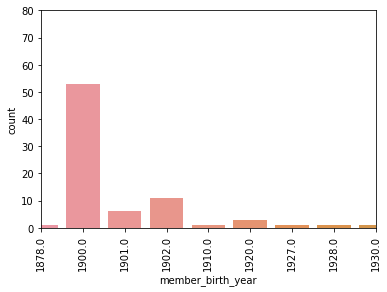

In [15]:
sb.countplot(data=gobike,x='member_birth_year')
plt.xticks(rotation=90)
plt.xlim(0,8)
plt.ylim(0,80)

their member that birth_year<=1920 & Age>99

there are not column for day and month and the hour of day the trip stated and the duration of trip 

### 3-Clean

copy the original datasets so any changes doesn't affect the original datasets

In [17]:
trips=gobike.copy()

### Define

1-change start_time and end_time to datetime

2-change user_type ,member_gender,bike_share_for_all_trip should be converted from object to Category using astype('category')

3-Drop the following columns ('start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude')

4-Add column for memeber_age baseed on member_birth_year column to see the distribution of ages, and delete the member_birth_year column

5-filter out the member who birth_year<=1920

6-Add column for day, month, hour of day and duration hour for trip

In [19]:
#change the start_time and end_time to datetime
trips.start_time=pd.to_datetime(trips.start_time)
trips.end_time=pd.to_datetime(trips.end_time)

In [21]:
#convert user_type,member_gender,bike_share_for_all_trip to Category
trips.user_type=trips.user_type.astype("category")
trips.member_gender=trips.member_gender.astype("category")
trips.bike_share_for_all_trip=trips.bike_share_for_all_trip.astype("category")

In [36]:
#drop the following columns('start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude')
drop_columns=['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude']
trips=trips.drop(drop_columns,axis=1)

In [37]:
#Add Columns for member_age instead of member_birth_year and deleted birth_year column
trips['member_age']=2019-trips.member_birth_year
trips=trips.drop('member_birth_year',axis=1)

In [38]:
#filter out the member who age >99
trips=trips.query('member_age<99')

In [39]:
#Add columns for day,month,hour that trip started ,and columns for duration_hour
trips['start_day']=trips.start_time.dt.day_name().astype('category')
trips['start_hour']=trips.start_time.dt.hour
trips['duration_hour']=((trips.duration_sec)/(60*60)).astype('int')
trips['duration_minutes']=((trips.duration_sec)/(60)).astype('int')

In [40]:
trips

,duration_sec,start_time,end_time,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_day,start_hour,duration_hour,duration_minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,Male,No,35.0,Thursday,17,14,869
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Customer,Male,No,47.0,Thursday,12,17,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Subscriber,Other,No,30.0,Thursday,17,10,608
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Subscriber,Male,Yes,45.0,Thursday,23,0,26
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,5200,Subscriber,Male,No,60.0,Thursday,23,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,4832,Subscriber,Male,No,23.0,Friday,0,0,8
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,4960,Subscriber,Male,No,35.0,Friday,0,0,5
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,3824,Subscriber,Male,Yes,29.0,Friday,0,0,2
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,5095,Subscriber,Male,No,31.0,Friday,0,0,2


### Test

In [41]:
#test all the changes in the datasets
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175072 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175072 non-null  int64         
 1   start_time               175072 non-null  datetime64[ns]
 2   end_time                 175072 non-null  datetime64[ns]
 3   bike_id                  175072 non-null  int64         
 4   user_type                175072 non-null  category      
 5   member_gender            175072 non-null  category      
 6   bike_share_for_all_trip  175072 non-null  category      
 7   member_age               175072 non-null  float64       
 8   start_day                175072 non-null  category      
 9   start_hour               175072 non-null  int64         
 10  duration_hour            175072 non-null  int32         
 11  duration_minutes         175072 non-null  int32         
dtypes: category(4), 

In [43]:
#To Test,check if their any user age> 99
trips.query('member_age>99')

,duration_sec,start_time,end_time,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_day,start_hour,duration_hour,duration_minutes


### What is the Structure of the dataset ?

there are 175072 row with 12 features {duration_sec start_time end_time bike_id user_type member_gender bike_share_for_all_trip member_age start_day start_hour duration_hour duration_minutes}

the data type for variable are integer(duration_sec,bike_id,start_hour,duration_hour,duration_minutes),datetime(start_time,end_time),category(user_type,member_gender,bike_share_for_all_trip,start_day)

### What is/are the main feature(s) of intrests in the datasets ?

Iam intrested to answering the following questions:

1-When are the most trips in terms of time of day,day of week?

2-How long does the average trip take?

3-Does the above append if user subscriber or customer?

4-Does the above append on the member age and gender ?

### what the features in the datasets do you think think will help support your investigation into your feature(s) of interest?

I expect the user_type,member_gender,member_age will effect the average that trip take, and in which time of day, or day of the week.

### Univariate Exploration

#### user_type,member_gender,bike_share_for_all_trip,member_age

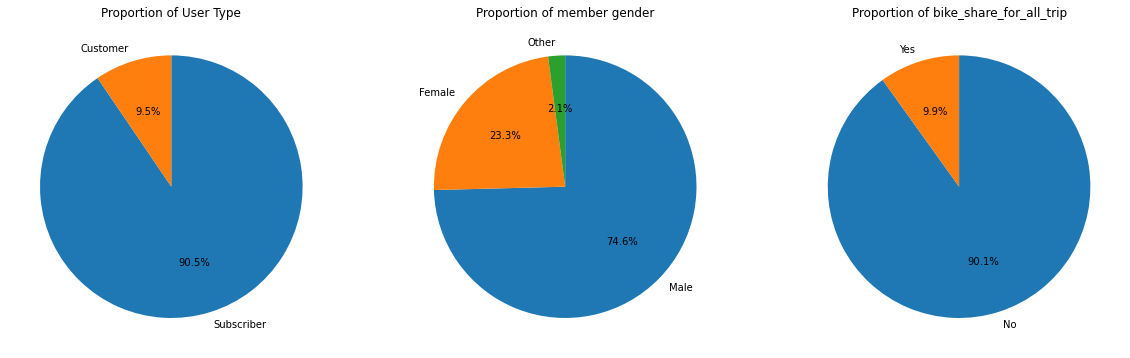

In [51]:
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
user_type_counts=trips['user_type'].value_counts()
plt.pie(user_type_counts.values,labels=user_type_counts.index,startangle=90,counterclock=False,autopct='%1.1f%%')
plt.title('Proportion of User Type');

plt.subplot(1,3,2)
member_gender_counts=trips['member_gender'].value_counts()
plt.pie(member_gender_counts.values,labels=member_gender_counts.index,startangle=90,counterclock=False,autopct='%1.1f%%')
plt.title('Proportion of member gender');


plt.subplot(1,3,3)
bike_share_counts=trips['bike_share_for_all_trip'].value_counts()
plt.pie(bike_share_counts.values,labels=bike_share_counts.index,startangle=90,counterclock=False,autopct='%1.1f%%')
plt.title('Proportion of bike_share_for_all_trip');



### From the figure above we have noticed that:

1-the Subscriber user type percent is larger than customer

2-The male is most bike user

3-90% of user doesn't share bike all trips

([<matplotlib.axis.XTick at 0x1d9daddc850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

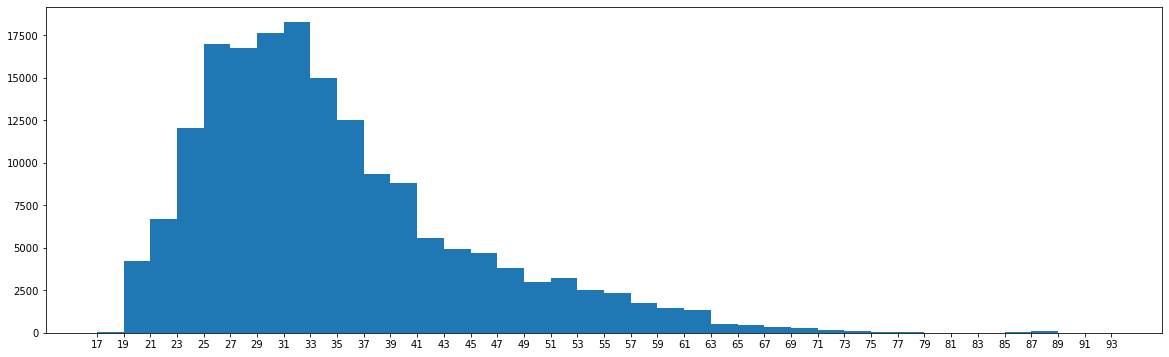

In [56]:
plt.figure(figsize=(20,6))
age_bins=np.arange(trips.member_age.min()-1,trips.member_age.max()+2,2)
plt.hist(data=trips,x='member_age',bins=age_bins)
plt.xticks(age_bins)

From the Figure above we notice that:

1-the most user age between 25 to 33 

2-The whole figure is right skewed and we can see normal distribuation from 19 to 43 

3- The number of user decreased in 49.

### Start_day,start_hour,duration_minutes

(0.0, 20.0)

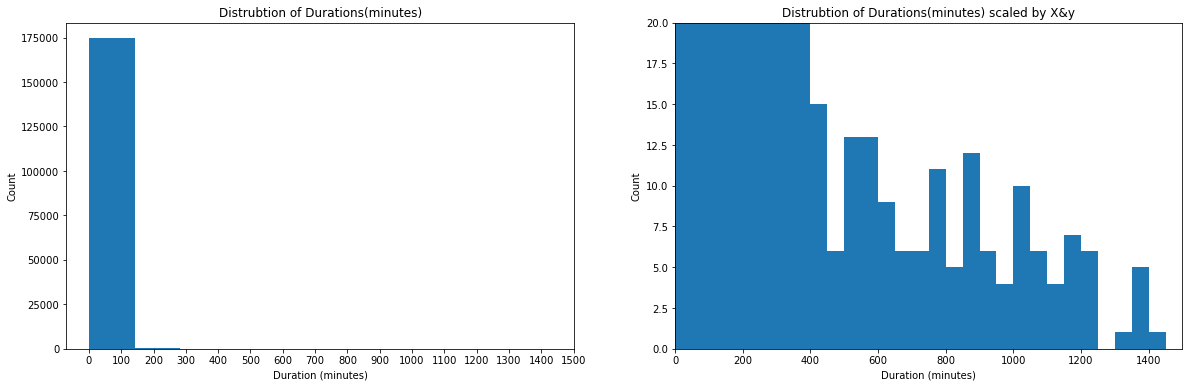

In [63]:
#plot the distrbution of 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
duration_bins=np.arange(trips.duration_minutes.min()-1,trips.duration_minutes.max()+100,100)
plt.hist(data=trips,x='duration_minutes')
plt.title('Distrubtion of Durations(minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.xticks(duration_bins);

#make y-scale from 0 to 20
plt.subplot(1,2,2)
duration_bins=np.arange(trips.duration_minutes.min()-1,trips.duration_minutes.max()+50,50)
plt.hist(data=trips,x='duration_minutes',bins=duration_bins)
plt.title('Distrubtion of Durations(minutes) scaled by X&y')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.xlim(0,1500)
plt.ylim(0,20)

In [65]:
trips.duration_minutes.describe()

count    175072.000000
mean         11.245350
std          27.366742
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_minutes, dtype: float64

From the figure above we notice that most user using bike from (1-2)hours and the diagram is right-skewed

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Saturday')])

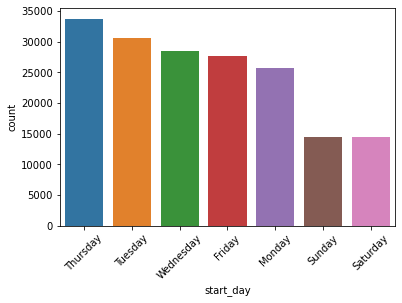

In [68]:
sb.countplot(data=trips,x='start_day',order=trips.start_day.value_counts().index)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='start_hour', ylabel='count'>

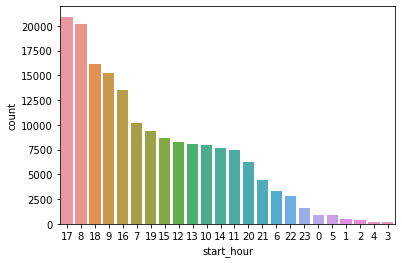

In [69]:
sb.countplot(data=trips,x='start_hour',order=trips.start_hour.value_counts().index)

### From the two plot we notice that :

1-The user use the bike the most in the work day and less in weekends

2-The user use the bike the most in work hours going and leave(8 AM,17=(5 PM)),(9 AM,18=(6 PM))

### Discuss the distribution(s) of your variable(s) of interest

1-the Subscriber user type percent is larger than customer

2-The male is most bike user

3-90% of user doesn't share bike all trips

4-the most user age between 25 to 33

5-The whole figure is right skewed and we can see normal distribuation from 19 to 43

6- The number of user decreased in 49.

7-From the figure above we notice that most user using bike from (1-2)hours

8-The user use the bike the most in the work day and less in weekends

9-The user use the bike the most in work hours going and leave(8 AM,17=(5 PM)),(9 AM,18=(6 PM))

## Bivariate Exploration

### user_type vs(member_gender,bike_share_for_all_trip,start_day)

<AxesSubplot:xlabel='user_type', ylabel='count'>

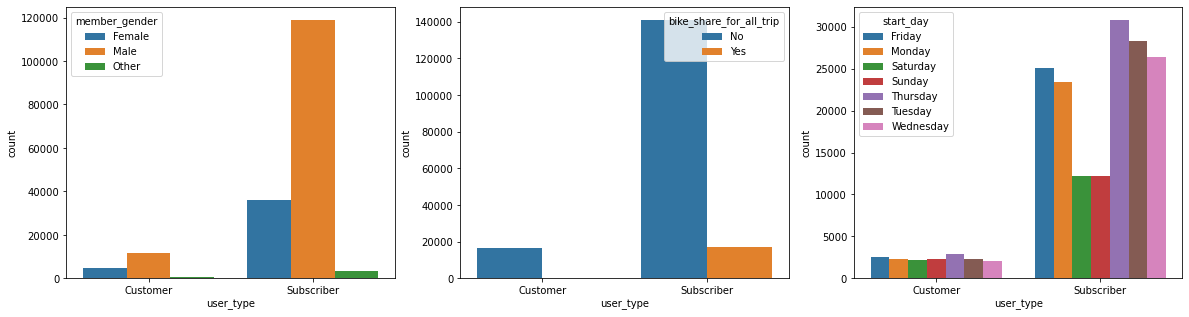

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sb.countplot(data=trips,x='user_type',hue='member_gender')

plt.subplot(1,3,2)
sb.countplot(data=trips,x='user_type',hue='bike_share_for_all_trip')

plt.subplot(1,3,3)
sb.countplot(data=trips,x='user_type',hue='start_day')


### From the figure above:

1-the males are the most number of customer and subscriber

2-the customer do not share  bike for all trips ,and subscriber mostly do not share bike for all trips

3-For Subscriber and Customer their trips in Sunday and Saturday are the least compared with the other day of the week.


### user_type vs (member_age,start_hour,duration_minutes)

([<matplotlib.axis.XTick at 0x1d9e1f76400>,
 [Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

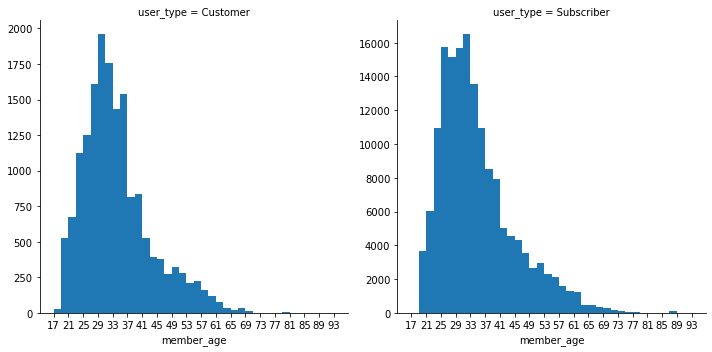

In [77]:
#the 2 plot do not share y
g=sb.FacetGrid(data=trips,col='user_type',sharey=False,col_wrap=2,height=5)
g.map(plt.hist,'member_age',bins=age_bins)
x_labels=np.arange(trips.member_age.min()-1,trips.member_age.max()+4,4)
plt.xticks(x_labels)

#### For Customer and Subscriber the most member age between 25-37

([<matplotlib.axis.YTick at 0x1d9e6f624f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

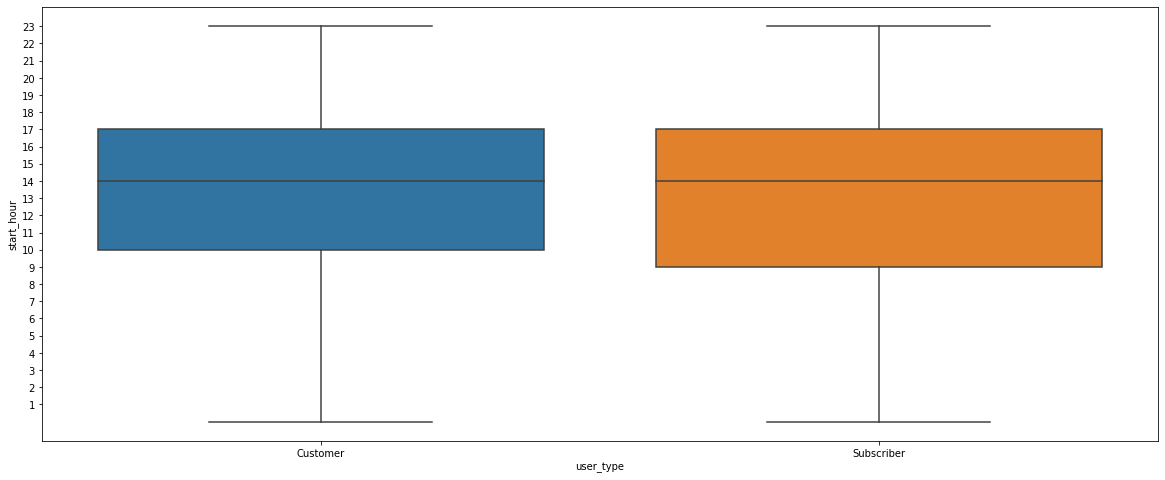

In [81]:
plt.figure(figsize=(20,8))
sb.boxplot(data=trips,x='user_type',y='start_hour')
plt.yticks(np.arange(1,24,1))

1-The median hour that the Customer and Subscriber start trip at (15 - 12 = 3 PM).

2-The Q1 = 10 AM, Q3 = (17 -> 5 PM) For Customer, and for Subscriber Q1 = 9 AM, and Q3 = (17 -> 5 PM).

<AxesSubplot:xlabel='user_type', ylabel='duration_minutes'>

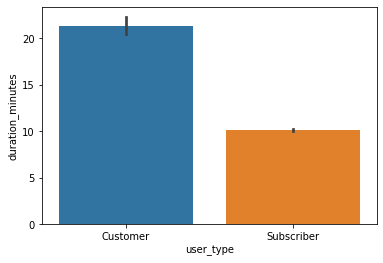

In [82]:
sb.barplot(data=trips,x='user_type',y='duration_minutes')

From the above plot we notice that the mean duration_munites for Customers is larger than Subscribers.



### member_gender vs(bike_share_for_all_trips,start_day)

<AxesSubplot:xlabel='member_gender', ylabel='count'>

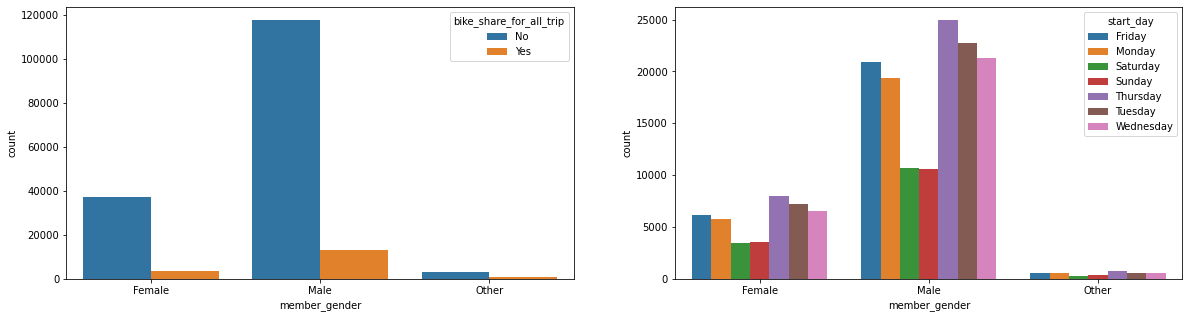

In [85]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sb.countplot(data=trips,x='member_gender',hue='bike_share_for_all_trip')

plt.subplot(1,2,2)
sb.countplot(data=trips,x='member_gender',hue='start_day')


The most users based on gender distribution does not share bike for all trips, and use the bikes mostly in work day espeically in Thursday, and use it less in the weekends.



### member_age vs (duratin_minutes,start_day)

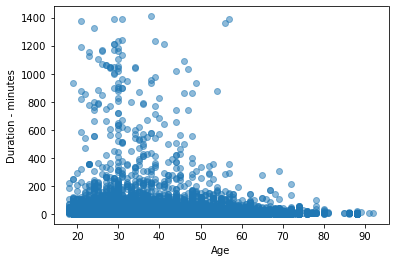

In [86]:
plt.scatter(data=trips,x='member_age',y='duration_minutes',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Duration - minutes');

The duration of minutes decrease when the age become older

([<matplotlib.axis.XTick at 0x1d9e3c39640>,
 [Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

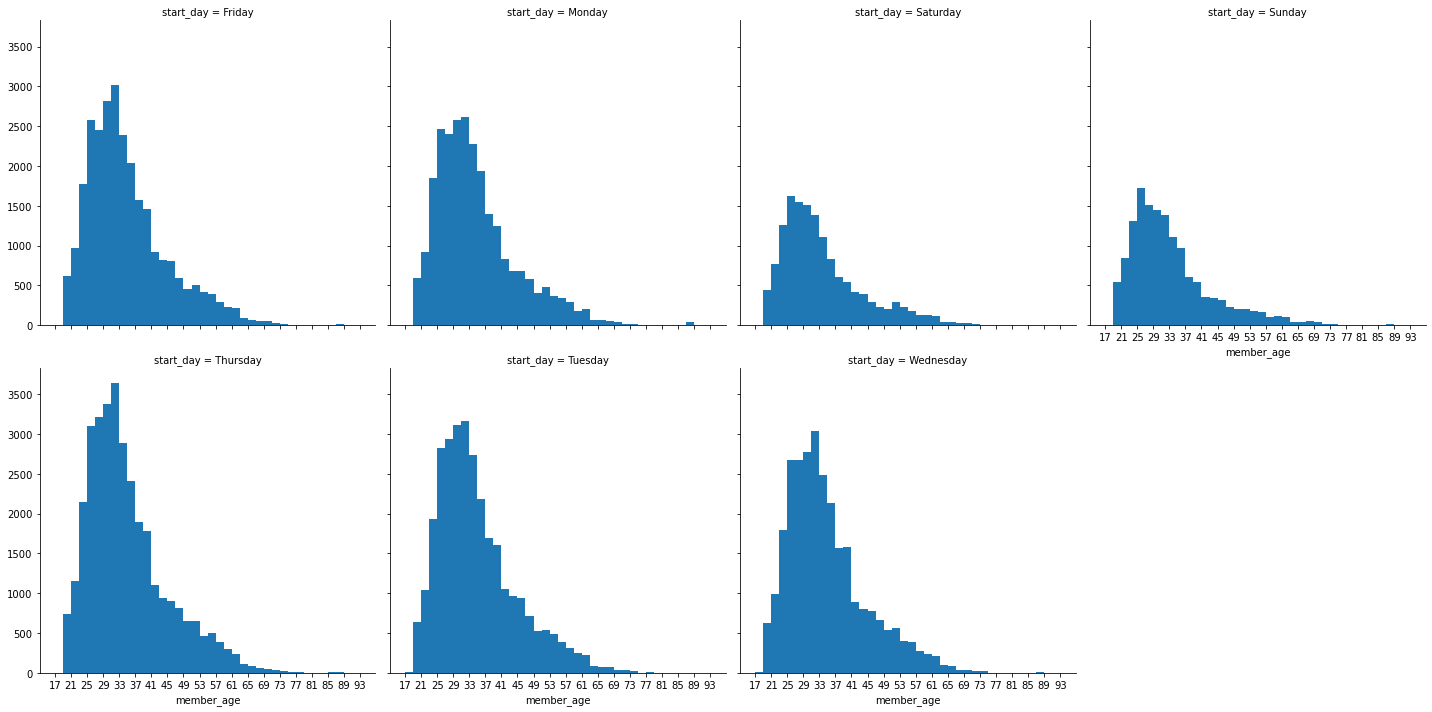

In [87]:
g=sb.FacetGrid(data=trips,col='start_day',col_wrap=4,height=5)
g.map(plt.hist,'member_age',bins=age_bins)
xticks = np.arange(trips.member_age.min()-1, trips.member_age.max() + 4, 4)
plt.xticks(xticks)

### Multivariate Exploration¶


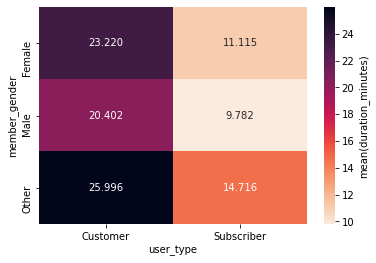

In [89]:
duration_means = trips.groupby(['user_type', 'member_gender']).mean()['duration_minutes']
duration_means = duration_means.reset_index(name = 'duration_minutes_avg')
duration_means = duration_means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'duration_minutes_avg')
sb.heatmap(duration_means, annot = True, fmt = '.3f', cmap='rocket_r',
           cbar_kws = {'label' : 'mean(duration_minutes)'});

### From the heatmap above we can notice the following:

1-The mean of duration(minutes) for Customer is higher than Subscriber.

2-The Customers who are gender = other their mean of duration(minutes) were the highest.

3-The Subscriber who are Males their trip duration are the smallest.

### user_type vs start_day vs duration_minutes


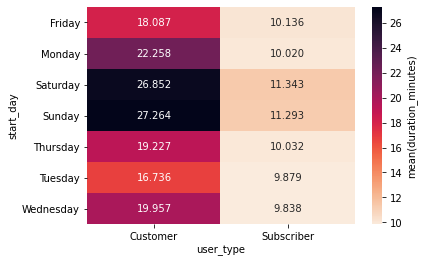

In [90]:
duration_means = trips.groupby(['user_type', 'start_day']).mean()['duration_minutes']
duration_means = duration_means.reset_index(name = 'duration_minutes_avg')
duration_means = duration_means.pivot(index = 'start_day', columns = 'user_type',
                            values = 'duration_minutes_avg')
sb.heatmap(duration_means, annot = True, fmt = '.3f', cmap='rocket_r',
           cbar_kws = {'label' : 'mean(duration_minutes)'});


From the heatmap above we can notice the following:

1-The mean of duration(minutes) for Customer is higher than Subscriber (Again).

2-The longest trip duration(minutes) on Saturday and Sunday for Customer and Subscriber, and that could explains why the number of trips in this day are the smallest.

3-The shortest trip duration(minutes) on Tuesday and Thursday for Customer and Subscriber, and that could explains why the number of trips in these day are the highest.